# This project will focus on: EDA on historical sale of houses

The purpose of this project is to develop an understanding of what drivers contribute to higher house prices so that the user of this data can reliablly estimate the current price of the house they are trying to sell/buy. f

Main processes in the project include:
- Uploading and looking at the data
- Develop understanding and scrutinizing data in various columns 
- Performing descriptive analysis using various graphs and pivot tables
- Running multi-linear regression to run basic prescriptive analytics

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [174]:
#uploading data
df_train = pd.read_csv("/Users/jimmylam/Downloads/house-prices-advanced-regression-techniques/train.csv")

In [175]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [177]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [178]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

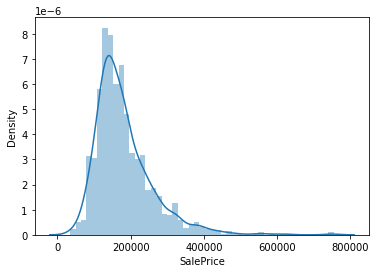

In [179]:
#histogram
sns.distplot(df_train['SalePrice']);

In [180]:
Understanding relationships between variables

#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

SyntaxError: invalid syntax (1095031765.py, line 1)

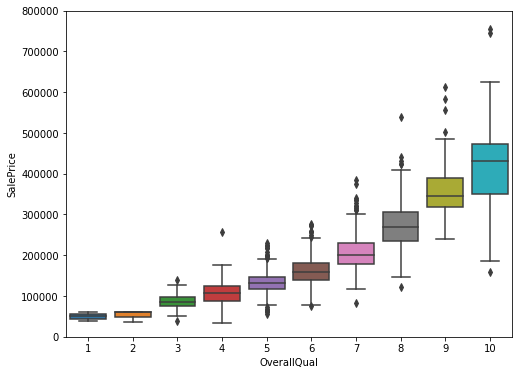

In [181]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [182]:
df_train['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [183]:
df_train['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [184]:
df_train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [185]:
df_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [186]:
df_train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [187]:
df_train['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [188]:
df_train['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [189]:
df_train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [190]:
df_train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [191]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [219]:

df = pd.DataFrame(df_train, columns=['SalePrice','BedroomAbvGr', 'Neighborhood', 'GrLivArea','Neighborhood','OverallQual','MSSubClass','HouseStyle','FullBath','GarageType','Fireplaces'])
df.head()

,SalePrice,BedroomAbvGr,Neighborhood,GrLivArea,Neighborhood,OverallQual,MSSubClass,HouseStyle,FullBath,GarageType,Fireplaces
0,208500,3,CollgCr,1710,CollgCr,7,60,2Story,2,Attchd,0
1,181500,3,Veenker,1262,Veenker,6,20,1Story,2,Attchd,1
2,223500,3,CollgCr,1786,CollgCr,7,60,2Story,2,Attchd,1
3,140000,3,Crawfor,1717,Crawfor,7,70,2Story,1,Detchd,1
4,250000,4,NoRidge,2198,NoRidge,8,60,2Story,2,Attchd,1


In [220]:
df.corr()

,SalePrice,BedroomAbvGr,GrLivArea,OverallQual,MSSubClass,FullBath,Fireplaces
SalePrice,1.000000,0.168213,0.708624,0.790982,-0.084284,0.560664,0.466929
BedroomAbvGr,0.168213,1.000000,0.521270,0.101676,-0.023438,0.363252,0.107570
GrLivArea,0.708624,0.521270,1.000000,0.593007,0.074853,0.630012,0.461679
OverallQual,0.790982,0.101676,0.593007,1.000000,0.032628,0.550600,0.396765
MSSubClass,-0.084284,-0.023438,0.074853,0.032628,1.000000,0.131608,-0.045569
FullBath,0.560664,0.363252,0.630012,0.550600,0.131608,1.000000,0.243671
Fireplaces,0.466929,0.107570,0.461679,0.396765,-0.045569,0.243671,1.000000


In [221]:
#use this to make a column into dummies
dummy_variable_1 = pd.get_dummies(df["MSSubClass"])

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("MSSubClass", axis = 1, inplace=True)


In [222]:
#use this to make a column into dummies
dummy_variable_2 = pd.get_dummies(df["Neighborhood"])

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Neighborhood", axis = 1, inplace=True)


In [223]:
#change column names
df.rename(columns={20:"1-STORY 1946 & NEWER ALL STYLES",
30:"1-STORY 1945 & OLDER",
40:"1-STORY W/FINISHED ATTIC ALL AGES", 
45:"1-1/2 STORY - UNFINISHED ALL AGES", 
50:"1-1/2 STORY FINISHED ALL AGES",
60:"2-STORY 1946 & NEWER", 
70:"2-STORY 1945 & OLDER", 
75:"2-1/2 STORY ALL AGES", 
80:"SPLIT OR MULTI-LEVEL", 
85:"SPLIT FOYER", 
90:"DUPLEX - ALL STYLES AND AGES", 
120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER", 
150:"1-1/2 STORY PUD - ALL AGES",
160:"2-STORY PUD - 1946 & NEWER", 
180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER", 
190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"}, inplace=True)


In [224]:
#use this to make a column into dummies
dummy_variable_3 = pd.get_dummies(df["HouseStyle"])

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_3], axis=1)

# drop original column "fuel-type" from "df"
df.drop("HouseStyle", axis = 1, inplace=True)


In [225]:
#use this to make a column into dummies
dummy_variable_4 = pd.get_dummies(df["FullBath"])

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_4], axis=1)

# drop original column "fuel-type" from "df"
df.drop("FullBath", axis = 1, inplace=True)


In [226]:
#use this to make a column into dummies
dummy_variable_5 = pd.get_dummies(df["GarageType"])

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_5], axis=1)

# drop original column "fuel-type" from "df"
df.drop("GarageType", axis = 1, inplace=True)

In [227]:
df.set_index('SalePrice')
df.head()

,SalePrice,BedroomAbvGr,GrLivArea,OverallQual,Fireplaces,1-STORY 1946 & NEWER ALL STYLES,1-STORY 1945 & OLDER,1-STORY W/FINISHED ATTIC ALL AGES,1-1/2 STORY - UNFINISHED ALL AGES,1-1/2 STORY FINISHED ALL AGES,...,0,1,2,3,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,208500,3,1710,7,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,181500,3,1262,6,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,223500,3,1786,7,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,140000,3,1717,7,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,250000,4,2198,8,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [228]:
#to set up pivot table comparing quality, overall condition

np.round(pd.pivot_table(df, values='SalePrice', 
                                index=['OverallQual','BedroomAbvGr'], 
                                columns=['Fireplaces'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, margins_name='Total'),2)

sum                                         
Fireplaces                       0          1         2        3      Total
OverallQual BedroomAbvGr                                                   
1           1               100300          0         0        0     100300
2           1                95311      60000         0        0     155311
3           2               929800          0         0        0     929800
            3               589075      91000         0        0     680075
            4                    0     139600         0        0     139600
4           0               253959          0         0        0     253959
            1               741100          0         0        0     741100
            2              4175197     352500    356000        0    4883697
            3              3951208     938000         0        0    4889208
            4              1046500     347332    135000        0    1528832
            5               118500          0    161500        0     280000
5           1               381000     165500    143000        0     689500
            2             10269298    2007550   1385697   190000   13852545
            3             18353234    9978333   1550050        0   29881617
            4              4583814    2230540    144000        0    6958354
            5               485300          0    135000        0     620300
            6              1006453          0         0        0    1006453
6           0               144000          0         0        0     144000
            1               695000    1170700    180000        0    2045700
            2              5745783    4465200    446000        0   10656983
            3             11586264   21112444   4238200        0   36936908
            4              2769000    4906520   1373524        0    9049044
            5               623500     527400    256000        0    1406900
            8               200000          0         0        0     200000
7           0                    0     260000         0        0     260000
            1               332900     596586    289000        0    1218486
            2              4578692    5919798   1116400        0   11614890
            3             16003701   21966523   3425500   205000   41600724
            4              1458000    7322239   1607200        0   10387439
            5               171000     242000    767000        0    1180000
8           0                    0     286000         0        0     286000
            1               212000    1662661    569500        0    2444161
            2              1028500    7101419    369900        0    8499819
            3              3819791   16895820   1371000        0   22086611
            4               488900   10350179   1344900   345000   12528979
            5                    0     310000         0        0     310000
9           0                    0     385000         0        0     385000
            1                    0    1263563         0        0    1263563
            2               239000    3149871    936657        0    4325528
            3                    0    4608490   1103000   360000    6071490
            4               342643    2147682   1267154        0    3757479
10          2                    0     850000   1021500        0    1871500
            3                    0    3263091         0   160000    3423091
            4                    0     625000   1975000        0    2600000
Total                     97518723  137698541  27667682  1260000  264144946

In [229]:
#establishing predictor variables
z = df.drop('SalePrice', axis=1)#predictor variables
z.head()

,BedroomAbvGr,GrLivArea,OverallQual,Fireplaces,1-STORY 1946 & NEWER ALL STYLES,1-STORY 1945 & OLDER,1-STORY W/FINISHED ATTIC ALL AGES,1-1/2 STORY - UNFINISHED ALL AGES,1-1/2 STORY FINISHED ALL AGES,2-STORY 1946 & NEWER,...,0,1,2,3,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,3,1710,7,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,3,1262,6,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,3,1786,7,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,3,1717,7,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,4,2198,8,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [243]:
lm = LinearRegression()
lm.fit(z, df['SalePrice']) #fitting linear models


LinearRegression()

In [244]:
lm.intercept_ #intercept value

-15048.952187599672

In [245]:
#prediction

Y_hat = lm.predict(z)

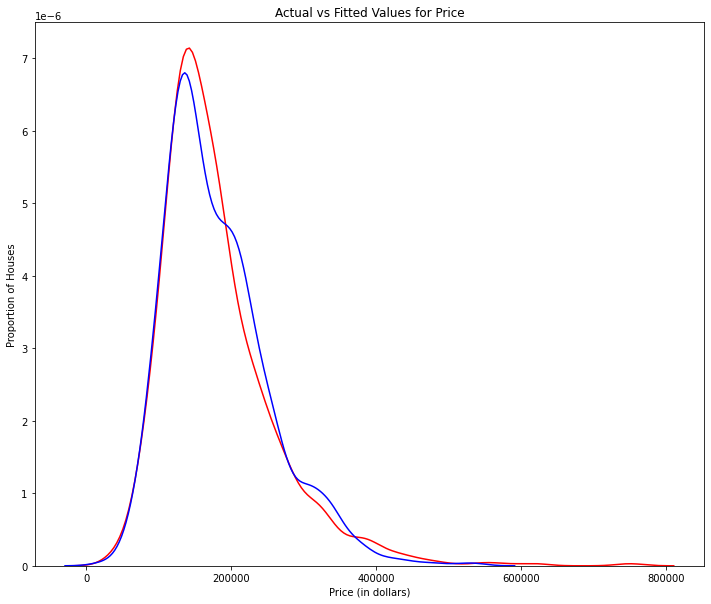

In [246]:
width = 12
height = 10
#linear function
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

In [248]:
# fit the model 
lm.fit(z, df['SalePrice'])
# Find the R^2
print('The R-square is: ', lm.score(z, df['SalePrice']))

#produce a prediction
Y_predict_multifit = lm.predict(z)

#to calc MSE:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['SalePrice'], Y_predict_multifit))

The R-square is:  0.8297628767745877
The mean square error of price and predicted value using multifit is:  1073649545.5607321
